Rubrica - Critérios de entrega e avaliação para nota:
R1 - NOTA 6: Use a imagem circulo.png para implementar um código que:

Segmenta apenas as 2 maiores áreas da imagem circulo.png. Use a técnica que achar mais apropriada. E exiba o resultado. (máx 3 pontos)

Calcule e exiba a área e o centro de massa das regiões segmentadas da imagem. O resultado esperado e uma imagem com marcação no centro indicando o Centro de Massa e o valor da área; (máx 3 pontos)

Essa rubrica pode ser feita no jupyter notebook ou google Colab.


{'m00': 22671.0, 'm10': 13875499.5, 'm01': 9063919.833333332, 'm20': 8533244460.0, 'm11': 5547443472.5, 'm02': 3664660393.6666665, 'm30': 5272754435330.75, 'm21': 3411593278639.7, 'm12': 2242897104590.5, 'm03': 1497831405094.85, 'mu20': 40920064.31828022, 'mu11': -14298.019904136658, 'mu02': 40883641.64455271, 'mu30': 613175.3837890625, 'mu21': -692483.7494888306, 'mu12': -617952.8051109314, 'mu03': 690732.5217285156, 'nu20': 0.07961500996366125, 'nu11': -2.781855346742301e-05, 'nu02': 0.07954414517935485, 'nu30': 7.923335015922788e-06, 'nu21': -8.948142546716868e-06, 'nu12': -7.985067940378218e-06, 'nu03': 8.92551351658781e-06}
{'m00': 22558.0, 'm10': 2455882.0, 'm01': 3001818.0, 'm20': 307852976.0, 'm11': 326825834.1666666, 'm02': 439963891.3333333, 'm30': 42329712137.0, 'm21': 40969515376.333336, 'm12': 47904413695.166664, 'm03': 69328464746.0, 'mu20': 40481914.82773295, 'mu11': 18901.217114329338, 'mu02': 40508651.27995974, 'mu30': -644911.7967453003, 'mu21': -936039.0468587875, 'm

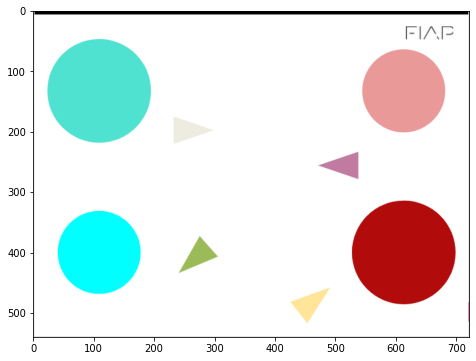

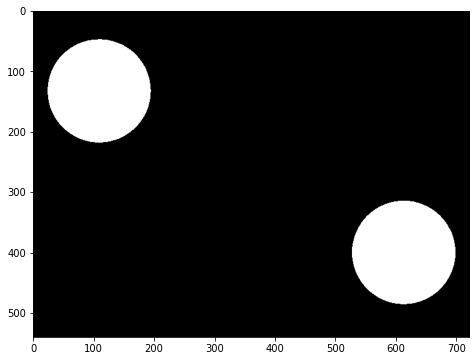

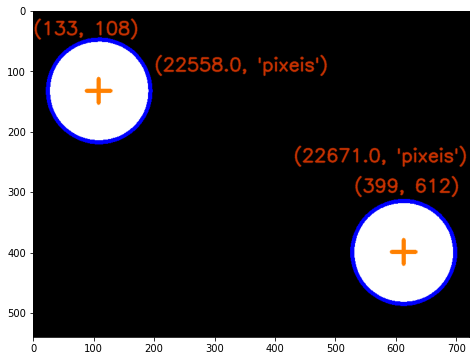

In [ ]:
%matplotlib inline
import math
import cv2
from matplotlib import pyplot as plt
import numpy as np


#puxando a imagem
img = cv2.imread('circulo.png')
#modificando a escala de cor para RGB e para HSV

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



plt.figure(figsize=(8,6))
plt.imshow(img);
#definindo o intervalo de mascara de cor
image_lower_hsv = np.array([10, 140, 20])
image_upper_hsv = np.array([170, 240, 240])


#mask-HSV
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
plt.figure(figsize=(8,6))
plt.imshow(mask_rgb);

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [0, 0, 255], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]
cnt2 = contornos[1]

M = cv2.moments(cnt)
print( M )
M2 = cv2.moments(cnt2)
print( M2 )


# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])


area1 = cv2.contourArea(contornos[0])
area2 = cv2.contourArea(contornos[1])

textArea1 = (area1, "pixeis");
textArea2 = (area2, "pixeis");

# print("Area do circulo da esquerda:", Area2)

print("Circulo Direita: ",cx, cy)
print("Circulo Esquerda: ",cx2, cy2)
size = 20
color = (255,128,0)

#Circulo direita
cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)


#Circulo Esquerda
cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem2 = (0,40)

font = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy2 , cx2
origem = (530,300)

origem3 = (430,250)
origem4 = (200,100)
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

cv2.putText(contornos_img, str(textArea1), origem3, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(textArea2), origem4, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornos_img);

*** R2 - NOTA 8: Faz o R1 e: ***

Traça uma reta entre os dois centros segmentados; (máx 0,5 pontos) Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com uma reta entre centros e o valor do ângulo exibido na tela; (máx 1,5 pontos)

Essa rubrica pode ser feita no jupyter notebook ou google Colab.

{'m00': 22646.0, 'm10': 13860052.0, 'm01': 9054223.833333332, 'm20': 8523601170.333333, 'm11': 5541455499.916666, 'm02': 3660822301.833333, 'm30': 5266674915395.0, 'm21': 3407856843473.95, 'm12': 2240528726495.0835, 'm03': 1496281082010.85, 'mu20': 40820924.69595909, 'mu11': -9356.995781898499, 'mu02': 40802465.03648901, 'mu30': 194648.3349609375, 'mu21': -327124.1125526428, 'mu12': -198061.18494415283, 'mu03': 333196.8518066406, 'nu20': 0.07959757418600627, 'nu11': -1.8245401628090546e-05, 'nu02': 0.07956157931021494, 'nu30': 2.5221559456885505e-06, 'nu21': -4.238710932812825e-06, 'nu12': -2.5663779518959862e-06, 'nu03': 4.317398456233771e-06}
{'m00': 22525.0, 'm10': 2451844.0, 'm01': 2997475.5, 'm20': 307254906.1666666, 'm11': 326271680.75, 'm02': 439265888.6666666, 'm30': 42233190657.0, 'm21': 40885111162.083336, 'm12': 47813638586.916664, 'm03': 69203669734.75, 'mu20': 40371931.678941876, 'mu11': -3228.0101332068443, 'mu02': 40382009.7276988, 'mu30': -436648.9334793091, 'mu21': -16

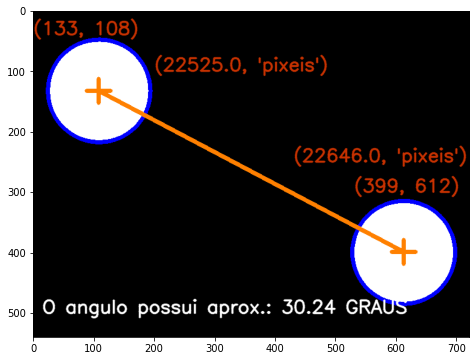

In [ ]:
%matplotlib inline
import math
import cv2
from matplotlib import pyplot as plt
import numpy as np


#puxando a imagem
img = cv2.imread('circulo.png')
#modificando a escala de cor para RGB e para HSV

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#definindo o intervalo de mascara de cor
image_lower_hsv = np.array([10, 150, 130])
image_upper_hsv = np.array([180, 240, 240])


#mask-HSV
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
plt.figure(figsize=(8,6))
plt.imshow(mask_rgb);

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [0, 0, 255], 5);

# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]
cnt2 = contornos[1]

M = cv2.moments(cnt)
print( M )
M2 = cv2.moments(cnt2)
print( M2 )


# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

#ou Se usar 'M00'
# cx = int(M['m00'])
# cx2 = int(M['m00'])
area1 = cv2.contourArea(contornos[0])
area2 = cv2.contourArea(contornos[1])

textArea1 = (area1, "pixeis");
textArea2 = (area2, "pixeis");

# print("Area do circulo da esquerda:", Area2)

print("Circulo Direita: ",cx, cy)
print("Circulo Esquerda: ",cx2, cy2)
size = 20
color = (255,128,0)

#Circulo direita
cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

#Linha Ponto a ponto
cv2.line(contornos_img,(cx2,cy2),(cx,cy),color,5)


#Circulo Esquerda
cv2.line(contornos_img,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

# Para escrever vamos definir uma fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem2 = (0,40)

font = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy2 , cx2
origem = (530,300)

origem3 = (430,250)
origem4 = (200,100)
cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(text2), origem2, font,1,(200,50,0),2,cv2.LINE_AA)

cv2.putText(contornos_img, str(textArea1), origem3, font,1,(200,50,0),2,cv2.LINE_AA)
cv2.putText(contornos_img, str(textArea2), origem4, font,1,(200,50,0),2,cv2.LINE_AA)

#Definindo o Angulo da reta
tan = (cy-cy2)/(cx-cx2)*(180/math.pi)

font = cv2.FONT_HERSHEY_SIMPLEX
text = "O angulo possui aprox.: "+f'{tan:.2f}'+" GRAUS"
origem = (15,500)
cv2.putText(contornos_img, str(text), origem, font,1,(255,255,255),2,cv2.LINE_AA)



plt.imshow(contornos_img);